# SOS Text Vectorization

In [1]:
import csv
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import random

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

%xmode Minimal

Exception reporting mode: Minimal


In [2]:
# load data 
sos = pd.read_csv('data/sos.csv')

In [3]:
sos.head()
sos.info()

,title,source,type_of_release,link,content,page_scraped,content_length,date_clean
0,Secretary Antony J. Blinken And Surinamese Pre...,Antony J. Blinken,Remarks,https://www.state.gov/secretary-antony-j-blink...,"SECRETARY BLINKEN: Well, good morning, everyon...",110.0,602,2022-09-15
1,"Targeting Russia’s Senior Officials, Defense I...",Antony J. Blinken,Press Statement,https://www.state.gov/targeting-senior-russian...,The United States continues to hold the Russia...,110.0,440,2022-09-15
2,Commemorating the International Day of Democracy,Antony J. Blinken,Press Statement,https://www.state.gov/commemorating-the-intern...,"This International Day of Democracy, we unders...",110.0,318,2022-09-15
3,Papua New Guinea National Day,Antony J. Blinken,Press Statement,https://www.state.gov/papua-new-guinea-nationa...,"On behalf of the United States of America, I e...",110.0,113,2022-09-15
4,El Salvador National Day,Antony J. Blinken,Press Statement,https://www.state.gov/el-salvador-national-day/,On behalf of the Government of the United Stat...,110.0,181,2022-09-15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1973 non-null   object 
 1   source           1973 non-null   object 
 2   type_of_release  1973 non-null   object 
 3   link             1973 non-null   object 
 4   content          1973 non-null   object 
 5   page_scraped     1959 non-null   float64
 6   content_length   1973 non-null   int64  
 7   date_clean       1973 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 123.4+ KB


In [4]:
# explore min_doc frequency options of 1-30
term_count = []

for i in range(1, 31):
    vectorizer = CountVectorizer(stop_words='english', min_df=i)
    dtm = vectorizer.fit_transform(sos.content)
    length = dtm.shape[1]
    term_count.append(length)

min_df = pd.DataFrame(data = {'Min Doc': range(1,31),
                              'Term Count': term_count})

In [5]:
# min_df

Text(0.5, 1.0, 'From 1973 press releases from the Department of State')

Text(0.5, 0.98, 'Minimum Document Frequency and Resulting Term Count')

Text(0, 0.5, 'Term Count')

Text(0.5, 0, 'Minimum Document Frequency')

([<matplotlib.axis.XTick at 0x7fa7816bffa0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

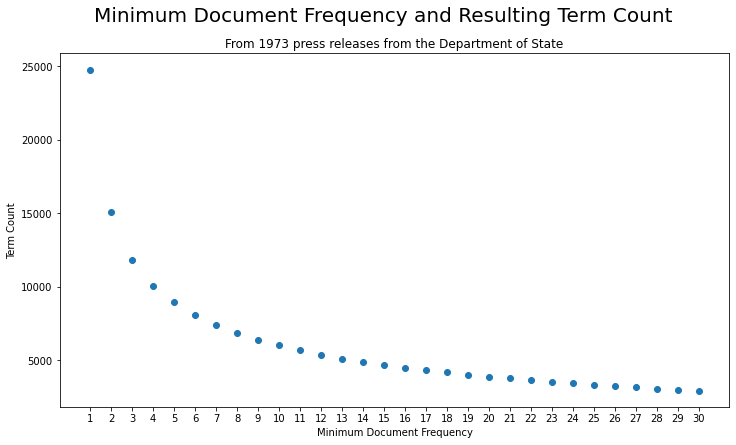

In [6]:
fig, ax = plt.subplots(figsize=(12,6.5))
# ax.plot(range(1,26), min_df['Term Count'], linewidth = 2.5, color = 'green')
ax.scatter(x = min_df['Min Doc'], y = min_df['Term Count'])
plt.title('From 1973 press releases from the Department of State')
plt.suptitle('Minimum Document Frequency and Resulting Term Count', size = 20)
plt.ylabel('Term Count')
plt.xlabel('Minimum Document Frequency')
plt.xticks(range(1,31))
#plt.savefig('min_doc_freq.png')

In [7]:
# define functions for testing hyper parameter easily
def convert_to_term_df(dtm_input, tfidf_vectorizer_input):
    content_index = pd.DataFrame(dtm_input.toarray()).head()
    term_indices = {index: term for term, index in tfidf_vectorizer_input.vocabulary_.items()}
    colterms = [term_indices[i] for i in range(dtm_input.shape[1])]
    final_df = pd.DataFrame(dtm_input.toarray(), columns=colterms)

    return final_df

In [8]:
# https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
def get_top_terms(dtm_input, tfidf_vectorizer_input, num):
    importance = np.argsort(np.asarray(dtm_input.sum(axis=0)).ravel())[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer_input.get_feature_names_out())
    return tfidf_feature_names[importance[: num]]

#### Stop words, min_df

In [9]:
# vectorize with stop words only 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=8)
dtm = tfidf_vectorizer.fit_transform(sos.content)
dtm.shape #(1973, 10075)

(1973, 6839)

In [10]:
df1 = convert_to_term_df(dtm, tfidf_vectorizer)
df1.head()

,000,10,100,100th,109,10th,11,110,116,11th,...,zayed,zealand,zelenskyy,zero,zeya,zimbabwe,zone,zones,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
get_top_terms(dtm, tfidf_vectorizer, 10)

array(['people', 'secretary', 'united', 'states', 'ukraine', 'question',
       'world', 've', 'president', 'thank'], dtype=object)

#### + words, only

In [12]:
# vectorzie with stop words and words only (remove numbers and must be 3 letters minimum)
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', min_df=8, token_pattern= r'\b[a-zA-Z]{3,}\b')
dtm2 = tfidf_vectorizer2.fit_transform(sos.content)
dtm2.shape #(1973, 9818)

(1973, 6637)

In [13]:
df2 = convert_to_term_df(dtm2, tfidf_vectorizer2)
df2.head()

,abandon,abandoned,abbas,abc,abducted,abdullah,abe,abhorrent,abide,abiding,...,zayed,zealand,zelenskyy,zero,zeya,zimbabwe,zone,zones,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
get_top_terms(dtm2, tfidf_vectorizer2, 15)

array(['people', 'secretary', 'united', 'states', 'ukraine', 'question',
       'world', 'president', 'thank', 'pompeo', 'russia', 'security',
       'today', 'countries', 'government'], dtype=object)

#### + bigrams

In [15]:
# vectorize with bigrams
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', min_df=8, ngram_range=(1,2), 
                                    token_pattern= r'\b[a-zA-Z]{3,}\b')
dtm3 = tfidf_vectorizer3.fit_transform(sos.content)
dtm3.shape  # (1973, 36877)
# larger number 

(1973, 15068)

In [16]:
df3 = convert_to_term_df(dtm3, tfidf_vectorizer3)
df3.head()

,abandon,abandoned,abbas,abc,abducted,abdullah,abe,abhorrent,abide,abiding,...,zealand,zelenskyy,zelenskyy said,zero,zeya,zimbabwe,zone,zones,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
get_top_terms(dtm3, tfidf_vectorizer3, 15)

array(['secretary', 'people', 'united', 'states', 'united states',
       'question', 'ukraine', 'world', 'president', 'thank', 'pompeo',
       'russia', 'secretary pompeo', 'security', 'today'], dtype=object)

####  + max_df

In [18]:
tfidf_vectorizer4 = TfidfVectorizer(stop_words='english', min_df=8, max_df=0.75, ngram_range=(1,2), 
                                    token_pattern= r'\b[a-zA-Z]{3,}\b')
dtm4 = tfidf_vectorizer4.fit_transform(sos.content)
dtm4.shape 
# larger number 37796 # only removed 4 words

(1973, 15064)

In [19]:
df4 = convert_to_term_df(dtm4, tfidf_vectorizer4)
df4.head()

,abandon,abandoned,abbas,abc,abducted,abdullah,abe,abhorrent,abide,abiding,...,zealand,zelenskyy,zelenskyy said,zero,zeya,zimbabwe,zone,zones,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
get_top_terms(dtm4, tfidf_vectorizer4, 15)

array(['secretary', 'question', 'ukraine', 'world', 'president', 'thank',
       'pompeo', 'russia', 'secretary pompeo', 'security', 'today',
       'countries', 'work', 'government', 'state'], dtype=object)

#### + sublinear_tf

In [21]:
tfidf_vectorizer5 = TfidfVectorizer(stop_words='english', min_df=8, max_df=0.75, sublinear_tf= True, 
                                    ngram_range=(1,2), token_pattern= r'\b[a-zA-Z]{3,}\b')
dtm5 = tfidf_vectorizer5.fit_transform(sos.content)
dtm5.shape 

(1973, 15064)

In [22]:
df5 = convert_to_term_df(dtm5, tfidf_vectorizer5)
df5.head()

,abandon,abandoned,abbas,abc,abducted,abdullah,abe,abhorrent,abide,abiding,...,zealand,zelenskyy,zelenskyy said,zero,zeya,zimbabwe,zone,zones,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
get_top_terms(dtm5, tfidf_vectorizer5, 20)

array(['secretary', 'world', 'security', 'government', 'today',
       'president', 'work', 'thank', 'countries', 'support', 'day',
       'continue', 'state', 'ukraine', 'forward', 'american',
       'department', 'rights', 'year', 'years'], dtype=object)

#### + lemmatization

In [24]:
# error instructed this
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maggiesullivan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maggiesullivan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
import re
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)]

In [26]:
tfidf_vectorizer8 = TfidfVectorizer(stop_words='english', min_df=8, max_df=0.75, sublinear_tf= True, 
                                    ngram_range=(1,2), token_pattern= r'\b[a-zA-Z]{3,}\b', 
                                    tokenizer=LemmaTokenizer())
dtm8 = tfidf_vectorizer8.fit_transform(sos.content)
dtm8.shape 

/Users/maggiesullivan/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


(1973, 15411)

In [27]:
get_top_terms(dtm8, tfidf_vectorizer8, 30)

array(['ha', 'year', 'country', 'government', 'secretary', 'security',
       'world', 'today', 'right', 'day', 'president', 'support', 'work',
       'american', 'thank', 'continue', 'wa', 'ukraine', 'partner',
       'department', 'partnership', 'forward', 'time', 'behalf', 'effort',
       'including', 'look', 'human', 'america', 'good'], dtype=object)

#### custom stop words (aka remove blinken, pompeo)

In [28]:
# # https://aparnamishra144.medium.com/how-to-add-custom-stopwords-and-remove-them-from-text-in-nlp-50d342cfafff
# stop_list = ["blinken", 'pompeo']

# stpwrd = nltk.corpus.stopwords.words('english')
# # extend()function is used to add custom stopwords 
# stpwrd.extend(stop_list)
# #stpwrd)

In [29]:
# tfidf_vectorizer_custom = TfidfVectorizer(stop_words=stpwrd, min_df=8, max_df=0.75, sublinear_tf= True, 
#                                     ngram_range=(1,2), token_pattern= r'\b[a-zA-Z]{3,}\b')
# dtm_custom = tfidf_vectorizer_custom.fit_transform(sos.content)
# dtm_custom.shape 

In [30]:
# get_top_terms(dtm_custom, tfidf_vectorizer_custom, 30)

In [31]:
# df_custom = convert_to_term_df(dtm_custom, tfidf_vectorizer_custom)
# df_custom.head()

In [32]:
# df_custom.to_csv('dtm_final_customstp.csv', index = False)

#### custom stpwords AND Lemm

In [33]:
# https://aparnamishra144.medium.com/how-to-add-custom-stopwords-and-remove-them-from-text-in-nlp-50d342cfafff
stop_list = ["blinken", 'pompeo', 'trump', 'biden','united', 'state', 'states','united states','ha', 'le', 'wa', 
             'could', 'doe', 'might','must', 'need', 'sha', 'would', "'d", "'ll", "'re", "'s", "'ve", "n't", 'wo']

# stop words based on error messages post lemmatization

stpwrd = nltk.corpus.stopwords.words('english')
# extend()function is used to add custom stopwords 
stpwrd.extend(stop_list)
#stpwrd

In [34]:
tfidf_vectorizer_final_lemm = TfidfVectorizer(stop_words=stpwrd, min_df=8, max_df=0.75, sublinear_tf= True, 
                                    ngram_range=(1,2), token_pattern= r'\b[a-zA-Z]{3,}\b', 
                                    tokenizer=LemmaTokenizer())

In [35]:
dtm_custom_lemm = tfidf_vectorizer_final_lemm.fit_transform(sos.content)
dtm_custom_lemm.shape 

(1973, 15976)

In [36]:
df_custom_lemm = convert_to_term_df(dtm_custom_lemm, tfidf_vectorizer_final_lemm)
df_custom_lemm.head()

,abandon,abandoned,abbas,abc,abducted,abdullah,abe,abhorrent,abide,abiding,...,zayed,zealand,zelenskyy,zelenskyy said,zero,zeya,zimbabwe,zone,zoom,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#df_custom_lemm.to_csv('data/df_custom_lemm.csv', index = False)

In [38]:
get_top_terms(dtm_custom_lemm, tfidf_vectorizer_final_lemm, 30)

array(['year', 'country', 'government', 'secretary', 'security', 'world',
       'right', 'today', 'day', 'also', 'president', 'support', 'work',
       'american', 'together', 'thank', 'continue', 'ukraine', 'partner',
       'department', 'partnership', 'forward', 'behalf', 'well', 'time',
       'one', 'look', 'effort', 'human', 'including'], dtype=object)

### Blinken Only 

In [39]:
blinken = pd.read_csv('data/blinken_2022.csv')

In [40]:
dtm_blinken_lemm = tfidf_vectorizer_final_lemm.fit_transform(blinken.content)
dtm_blinken_lemm.shape 

(1019, 8682)

In [41]:
df_blinken_lemm = convert_to_term_df(dtm_blinken_lemm, tfidf_vectorizer_final_lemm)
df_blinken_lemm.head()

,abc,abe,abide,abiding,ability,ability defend,ability get,able,able come,able get,...,young woman,younger,youth,zambia,zealand,zelenskyy,zelenskyy said,zero,zeya,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.075955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_blinken_lemm.to_csv('data/df_blinken_lemm.csv', index = False)

In [43]:
blinken_100_lemm = get_top_terms(dtm_blinken_lemm, tfidf_vectorizer_final_lemm, 100)
blinken_100_lemm

array(['ukraine', 'year', 'country', 'security', 'secretary', 'thank',
       'also', 'world', 'together', 'support', 'today', 'day', 'work',
       'government', 'russia', 'continue', 'president', 'right',
       'partner', 'forward', 'partnership', 'including', 'one', 'many',
       'well', 'time', 'effort', 'look', 'minister', 'department', 'good',
       'international', 'behalf', 'america', 'much', 'working', 'foreign',
       'human', 'challenge', 'independence', 'commitment', 'global',
       'economic', 'around', 'look forward', 'think', 'important', 'see',
       'wish', 'shared', 'human right', 'democratic', 'action',
       'relationship', 'peace', 'democracy', 'make', 'value', 'russian',
       'new', 'way', 'region', 'war', 'future', 'around world',
       'opportunity', 'ally', 'welcome', 'cooperation', 'first', 'issue',
       'strong', 'climate', 'like', 'two', 'celebrate', 'come', 'nation',
       'going', 'american', 'national', 'committed', 'community', 'want',
     

### Pompeo Only 

In [44]:
pompeo = pd.read_csv('data/pompeo_2020.csv')

In [45]:
dtm_pompeo_lemm = tfidf_vectorizer_final_lemm.fit_transform(pompeo.content)
dtm_pompeo_lemm.shape 

(954, 7714)

In [46]:
df_pompeo_lemm = convert_to_term_df(dtm_pompeo_lemm, tfidf_vectorizer_final_lemm)
df_pompeo_lemm.head()

,abandoned,abdullah,abide,ability,able,able achieve,able buy,able get,able make,abortion,...,young,young men,young people,young soldier,youth,zealand,zero,zimbabwe,zone,zte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_pompeo_lemm.to_csv('data/df_pompeo_lemm.csv', index = False)

In [48]:
pompeo_100_lemm = get_top_terms(dtm_pompeo_lemm, tfidf_vectorizer_final_lemm, 100)
pompeo_100_lemm

array(['government', 'american', 'year', 'right', 'country', 'world',
       'secretary', 'security', 'today', 'president', 'day', 'work',
       'question', 'behalf', 'support', 'continue', 'department', 'human',
       'peace', 'also', 'independence', 'nation', 'regime', 'economic',
       'iran', 'america', 'freedom', 'look', 'time', 'effort', 'china',
       'together', 'commitment', 'partnership', 'national', 'action',
       'prosperity', 'well', 'international', 'chinese', 'partner',
       'wish', 'one', 'forward', 'american people', 'good', 'human right',
       'behalf government', 'two', 'thank', 'make', 'know', 'party',
       'democracy', 'including', 'celebrate', 'important', 'region',
       'want', 'foreign', 'shared', 'democratic', 'health', 'global',
       'value', 'new', 'around', 'pandemic', 'look forward', 'made',
       'citizen', 'like', 'see', 'come', 'thing', 'free', 'anniversary',
       'get', 'place', 'law', 'think', 'working', 'congratulate', 'many',
     

## Compare Both

In [49]:
same_terms_lemm = [i for i in blinken_100_lemm if i in pompeo_100_lemm]
len(same_terms_lemm)
same_terms_lemm

74

['year',
 'country',
 'security',
 'secretary',
 'thank',
 'also',
 'world',
 'together',
 'support',
 'today',
 'day',
 'work',
 'government',
 'continue',
 'president',
 'right',
 'partner',
 'forward',
 'partnership',
 'including',
 'one',
 'many',
 'well',
 'time',
 'effort',
 'look',
 'department',
 'good',
 'international',
 'behalf',
 'america',
 'working',
 'foreign',
 'human',
 'challenge',
 'independence',
 'commitment',
 'global',
 'economic',
 'around',
 'look forward',
 'think',
 'important',
 'see',
 'wish',
 'shared',
 'human right',
 'democratic',
 'action',
 'relationship',
 'peace',
 'democracy',
 'make',
 'value',
 'new',
 'way',
 'region',
 'around world',
 'cooperation',
 'first',
 'like',
 'two',
 'celebrate',
 'come',
 'nation',
 'going',
 'american',
 'national',
 'want',
 'thing',
 'know',
 'question',
 'best',
 'health']

In [50]:
pompeo_unique_lemm = [i for i in pompeo_100_lemm if i not in blinken_100_lemm]
len(pompeo_unique_lemm)
pompeo_unique_lemm

26

['regime',
 'iran',
 'freedom',
 'china',
 'prosperity',
 'chinese',
 'american people',
 'behalf government',
 'party',
 'pandemic',
 'made',
 'citizen',
 'free',
 'anniversary',
 'get',
 'place',
 'law',
 'congratulate',
 'take',
 'communist',
 'election',
 'political',
 'republic',
 'iranian',
 'back',
 'communist party']

In [51]:
blinken_unique_lemm = [i for i in blinken_100_lemm if i not in pompeo_100_lemm]
len(blinken_unique_lemm)
blinken_unique_lemm

26

['ukraine',
 'russia',
 'minister',
 'much',
 'russian',
 'war',
 'future',
 'opportunity',
 'ally',
 'welcome',
 'issue',
 'strong',
 'climate',
 'committed',
 'community',
 'aggression',
 'assistance',
 'million',
 'foreign minister',
 'stand',
 'everyone',
 'every',
 'say',
 'behalf america',
 'part',
 'help']